By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/11

Videos:
* [[10分鐘搞懂機器學習] 8.6 集弱小變強大 自適應增強 AdaBoost](https://youtu.be/Yq5M-2_ni3Y)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


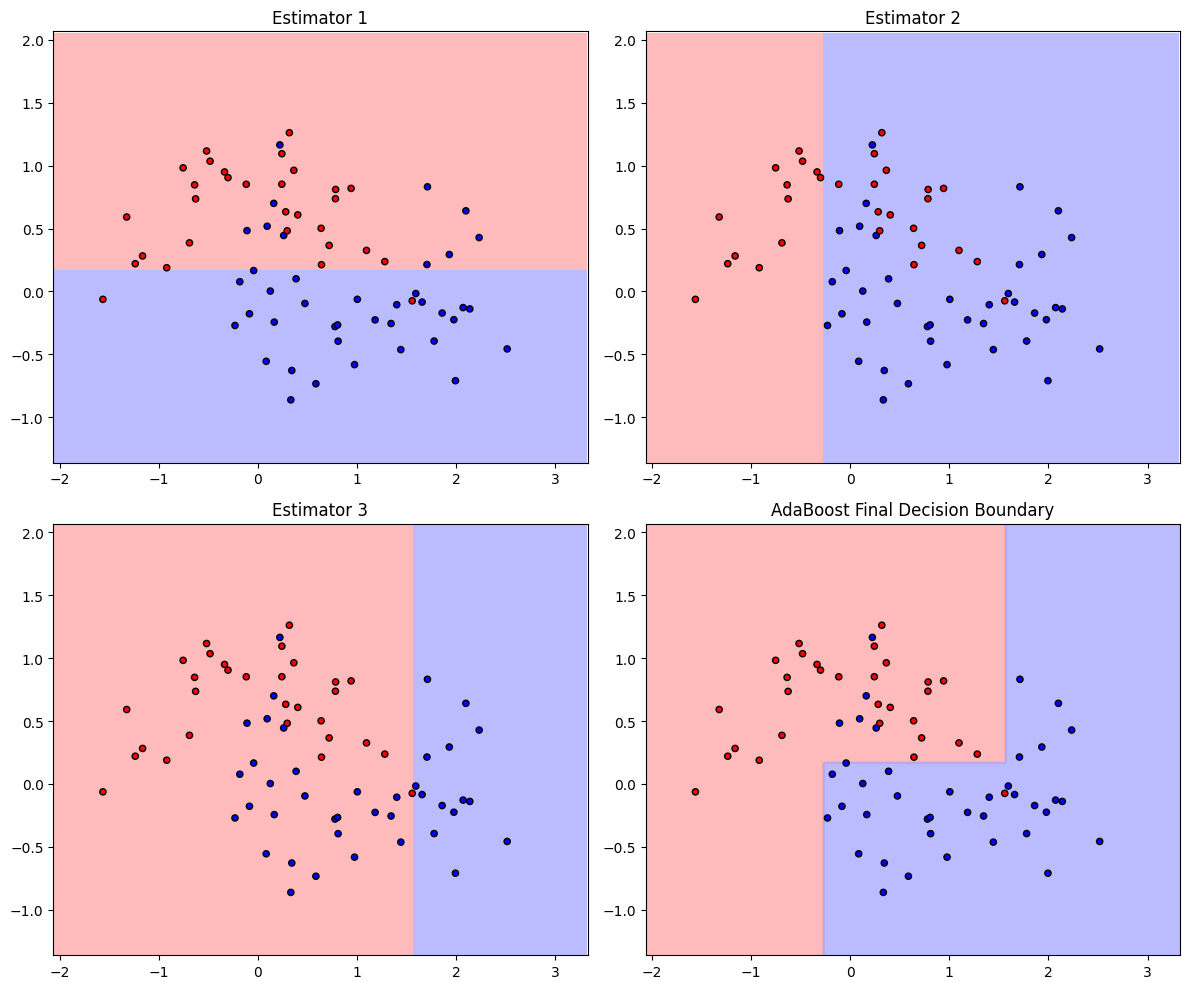

In [ ]:
# Python code: AdaBoost範例，n_estimators=3，呈現每個estimator和最終AdaBoost的decision boundary，使用moons dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# 生成 moons 二分类数据集
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 训练 AdaBoost 模型，设置 n_estimators=3
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=3, algorithm='SAMME')
adaboost.fit(X_train, y_train)

# 创建一个颜色映射
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# 设置图表的网格范围
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

plt.figure(figsize=(12, 10))

# 绘制每个弱分类器的决策边界
for i, estimator in enumerate(adaboost.estimators_):
    plt.subplot(2, 2, i + 1)

    # 计算当前分类器的预测结果
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制决策边界
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)

    # 绘制训练样本
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', s=20)
    plt.title(f'Estimator {i+1}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

# 绘制 AdaBoost 的整体决策边界
plt.subplot(2, 2, 4)

# 计算整体模型的预测结果
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制 AdaBoost 的整体决策边界
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)

# 绘制训练样本
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', s=20)
plt.title('AdaBoost Final Decision Boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()


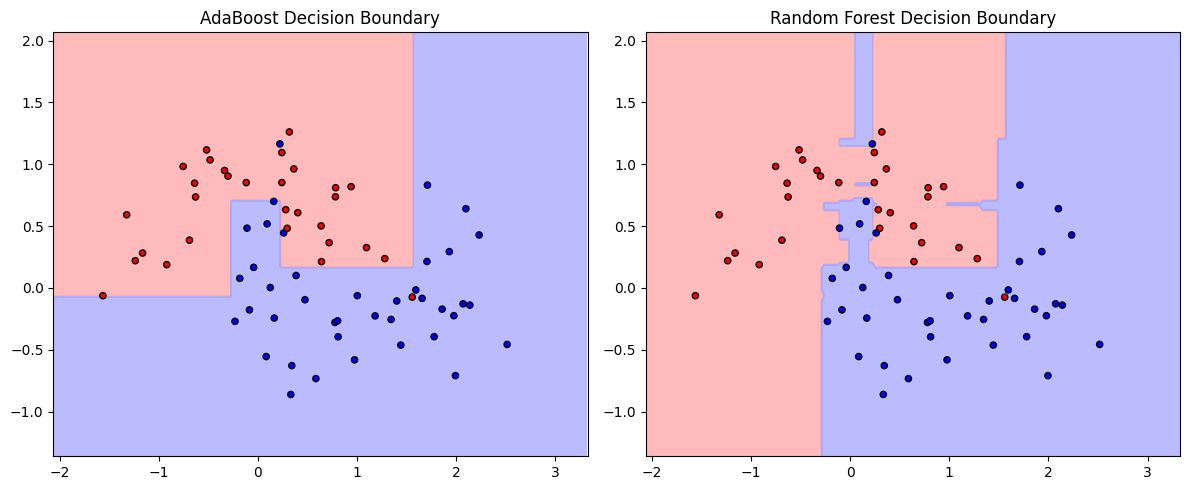

In [ ]:
# 使用以下數據，比較AdaBoost和 RandomForrest兩個的decision
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# 生成 moons 二分类数据集
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


n_estimators=10
# 训练 AdaBoost 模型，设置 n_estimators=3
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n_estimators, algorithm='SAMME')
adaboost.fit(X_train, y_train)

# 训练 RandomForest 模型，设置 n_estimators=3
random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
random_forest.fit(X_train, y_train)

# 创建一个颜色映射
cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_points = ListedColormap(['#FF0000', '#0000FF'])

# 设置图表的网格范围
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

plt.figure(figsize=(12, 5))

# 绘制 AdaBoost 的决策边界
plt.subplot(1, 2, 1)
Z = adaboost.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', s=20)
plt.title('AdaBoost Decision Boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 绘制 Random Forest 的决策边界
plt.subplot(1, 2, 2)
Z = random_forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', s=20)
plt.title('Random Forest Decision Boundary')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()
